In [1]:
import os
from EmotionAI import *
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
root_path = os.getcwd()+'/EmotionAI'
path_dictionary = build_environment_path(root_path=root_path)
content_full = []
for emotion in EMOTIONS:
    path_of_emotion = path_dictionary[emotion]
    emotion_files =  [f for f in os.listdir(path_of_emotion) if os.path.isfile(os.path.join(path_of_emotion, f))]
    content = ''
    for emotion_file in emotion_files:
        with open(path_of_emotion+'/'+emotion_file, 'r') as file:
        # Read the entire content of the file
            content = content + file.read()+'\n'
    content_full.append(content)

In [3]:
content_full_df = [pd.DataFrame(content.split('\n')) for content in content_full]
filtered_df = pd.DataFrame(columns=EMOTIONS)
k=0
for content in content_full_df:
    content.replace('', np.nan, inplace=True)
    content.dropna(subset=[0], inplace=True)
    filtered_df[EMOTIONS[k]]=content.reset_index().drop('index',axis=1).loc[0:149]
    k=k+1

In [4]:
for emotion in EMOTIONS:
    filtered_df[emotion] = filtered_df[emotion].str.replace(r'\d+\.', '')

/var/folders/zy/fwj_m0697v936qlt3c751l780000gn/T/ipykernel_50062/4163917001.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  filtered_df[emotion] = filtered_df[emotion].str.replace(r'\d+\.', '')


In [5]:
filtered_df

,Goofy Sadness,Funny Anger,Silly Disgust,Joy,Silly Fear
0,Tripping over my own feet is my signature move.,WHO ORDERED A SPICY MAYONNAISE PIZZA?,"Brace yourselves, folks, for the Stink Brigad...","The sun was shining brightly, casting a warm ...",I couldn't sleep last night because I was afr...
1,I have a talent for turning simple tasks into...,I SPECIFICALLY SAID NO TOOTHPASTE WITH ORANGE...,"Attention, everyone, prepare to witness the s...",Sarah couldn't stop giggling as she chased af...,"Whenever I see a spider, I scream as if it's ..."
2,My sense of direction is so terrible that I g...,WHO KEEPS REPLACING MY ICE CREAM WITH BROCCOLI?,"Hold your noses tight, for the odor of doom i...",Max grinned from ear to ear as he opened his ...,The sound of thunder makes me jump and hide u...
3,"Whenever I try to be cool, I end up looking l...",DOES THE WORLD REALLY NEED ANOTHER KETCHUP FL...,"Folks, we're about to encounter a smell that ...","The ice cream truck's jingle filled the air, ...",I'm scared that my toys come alive and have p...
4,I've mastered the art of talking with my mout...,WHY IS THERE A WHOLE CONCERT HAPPENING IN MY ...,"Ready or not, here comes a whiff that will ma...",Emily's laughter filled the room as she playe...,I'm terrified of clowns because they always s...
...,...,...,...,...,...
145,I've been known to lock myself out of my own ...,WHY DO I ALWAYS STEP ON LEGOS IN THE MIDDLE O...,Bella accidentally drank spoiled milk and mad...,The balloon animals brought giggles of deligh...,The sight of a monkey with a megaphone mobili...
146,I have a talent for accidentally stepping on ...,WHO USED MY HAIRBRUSH AND LEFT IT FILLED WITH...,Liam stepped on a pile of squishy tomatoes an...,Mary's funny stories had her friends laughing...,I jump in fright at the sound of a tiny insec...
147,I once mistook my mom's face cream for toothp...,REALLY? YOU JUST ATE THE LAST PIECE OF CAKE!,"Harper's socks were so smelly, the family dog...",The friendly neighbor's joke had everyone in ...,I'm terrified of a turtle breakdancing in slo...
148,I'm an expert at getting my fingers stuck in ...,WHERE DID MY FAVORITE PAIR OF EARRINGS GO? HMM?,Violet's pet lizard escaped from its cage and...,The puppet show had the children in the audie...,The thought of a bee wearing a tutu ballet da...


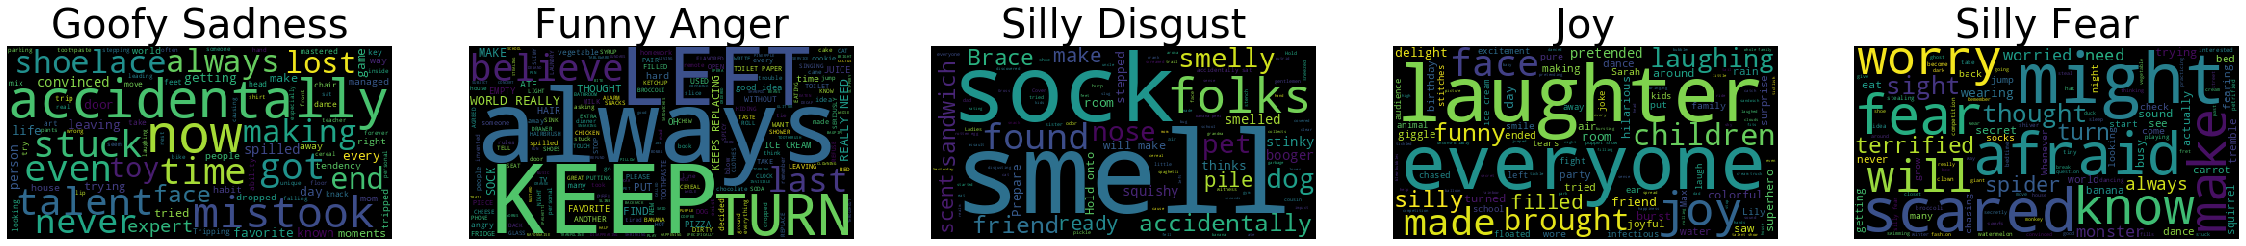

In [6]:
k=1
plt.figure(figsize=(40,20))
for emotion in EMOTIONS:
    plt.subplot(1,len(EMOTIONS),k)
    test = '.'.join(filtered_df[emotion].values.tolist())
    wc = WordCloud().generate(test)
    plt.title(emotion,fontsize=40)
    plt.imshow(wc)
    plt.axis('off')
    k=k+1

In [7]:
from openai import OpenAI
client = OpenAI(api_key=OPEN_AI_API_KEY)

def get_embedding(text, model="text-embedding-ada-002"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], model=model).data[0].embedding
for emotion in EMOTIONS:
    print('Embedding emotion = %s ...' %(emotion))
    filtered_df[emotion+'_embedded'] = filtered_df[emotion].apply(lambda x: get_embedding(x, model='text-embedding-ada-002'))

Embedding emotion = Goofy Sadness ...
Embedding emotion = Funny Anger ...
Embedding emotion = Silly Disgust ...
Embedding emotion = Joy ...
Embedding emotion = Silly Fear ...


In [8]:
filtered_df.head()

,Goofy Sadness,Funny Anger,Silly Disgust,Joy,Silly Fear,Goofy Sadness_embedded,Funny Anger_embedded,Silly Disgust_embedded,Joy_embedded,Silly Fear_embedded
0,Tripping over my own feet is my signature move.,WHO ORDERED A SPICY MAYONNAISE PIZZA?,"Brace yourselves, folks, for the Stink Brigad...","The sun was shining brightly, casting a warm ...",I couldn't sleep last night because I was afr...,"[-0.03035016544163227, -0.019595762714743614, ...","[0.008654003031551838, -0.021164607256650925, ...","[0.009476916864514351, -0.019993824884295464, ...","[0.008804849348962307, 0.0015233027515932918, ...","[-0.0017481890972703695, -0.003798338118940592..."
1,I have a talent for turning simple tasks into...,I SPECIFICALLY SAID NO TOOTHPASTE WITH ORANGE...,"Attention, everyone, prepare to witness the s...",Sarah couldn't stop giggling as she chased af...,"Whenever I see a spider, I scream as if it's ...","[-0.020451880991458893, -0.009337599389255047,...","[-0.002442538971081376, -0.003099567024037242,...","[0.008118752390146255, 0.007626502774655819, 0...","[-0.021745869889855385, -0.004192238207906485,...","[-0.013881472870707512, -0.017678646370768547,..."
2,My sense of direction is so terrible that I g...,WHO KEEPS REPLACING MY ICE CREAM WITH BROCCOLI?,"Hold your noses tight, for the odor of doom i...",Max grinned from ear to ear as he opened his ...,The sound of thunder makes me jump and hide u...,"[-0.02968568168580532, -0.0011678870068863034,...","[-0.002047550631687045, -0.03711458295583725, ...","[0.0019133933819830418, -0.010821705684065819,...","[-0.008314940147101879, -0.010088451206684113,...","[-0.020229926332831383, -0.025455784052610397,..."
3,"Whenever I try to be cool, I end up looking l...",DOES THE WORLD REALLY NEED ANOTHER KETCHUP FL...,"Folks, we're about to encounter a smell that ...","The ice cream truck's jingle filled the air, ...",I'm scared that my toys come alive and have p...,"[-0.018357563763856888, -0.004680362995713949,...","[0.038383036851882935, 0.00961616076529026, 0....","[0.022891227155923843, 0.003891508560627699, -...","[-0.010930119082331657, -0.01985139213502407, ...","[-0.027027485892176628, -0.005320719908922911,..."
4,I've mastered the art of talking with my mout...,WHY IS THERE A WHOLE CONCERT HAPPENING IN MY ...,"Ready or not, here comes a whiff that will ma...",Emily's laughter filled the room as she playe...,I'm terrified of clowns because they always s...,"[-0.012285381555557251, 0.0030584880150854588,...","[-0.003746562171727419, -0.025758415460586548,...","[0.007263446692377329, -0.0365014523267746, -0...","[-0.03354714810848236, -0.017465656623244286, ...","[-0.024343399330973625, -0.013797929510474205,..."


In [9]:
embedded_data = np.array(filtered_df[filtered_df.columns[5::]])
value = []
for row in embedded_data:
    for column in row:
        value.append(np.array(column))

In [10]:
value= np.array(value)
from sklearn.decomposition import PCA
pca =PCA (n_components=2)
pca.fit(value)

PCA(n_components=2)

In [11]:
filtered_df_PCA = filtered_df.copy()
for column in filtered_df.columns[5::]:
    filtered_df_PCA[column]=[pca.transform(np.array(filtered_df[column].loc[i]).reshape(1,-1)) for i in range(len(filtered_df))]
    for row in range(len(filtered_df_PCA[column])):
        filtered_df_PCA[column].loc[row] = np.array((filtered_df_PCA[column].loc[row])[0])

In [12]:
PCA_values = filtered_df_PCA[filtered_df.columns[5::]].values


In [13]:
emotion_pca_dict = {emotion : [] for i in EMOTIONS}
for k in range(len(EMOTIONS)):
    component_column_zero = [PCA_values[:,k][i][0] for i in range(PCA_values.shape[0])]
    component_column_one = [PCA_values[:,k][i][1] for i in range(PCA_values.shape[0])]
    emotion_pca_dict[EMOTIONS[k]] = {'PCA 1': component_column_zero, 'PCA 2': component_column_one}

Text(0, 0.5, 'PCA 2')

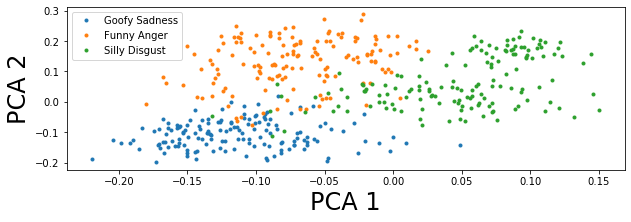

In [39]:
plt.figure(figsize=(10,3))
for emotion in EMOTIONS[0:3]:
    x = emotion_pca_dict[emotion]['PCA 1']
    y = emotion_pca_dict[emotion]['PCA 2']
    plt.plot(x,y,'.',label=emotion)
    plt.legend(fontsize=10)
plt.xlabel('PCA 1',fontsize=24)
plt.ylabel('PCA 2',fontsize=24)

Text(0, 0.5, 'PCA 2')

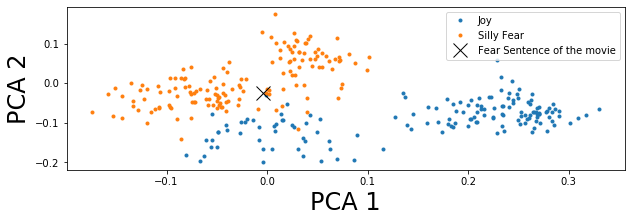

In [46]:
embedding_fear = get_embedding(FEAR_SENTENCE)
transform_fear = pca.transform(np.array(embedding_fear).reshape(1,-1))[0]
plt.figure(figsize=(10,3))
for emotion in EMOTIONS[3:]:
    x = emotion_pca_dict[emotion]['PCA 1']
    y = emotion_pca_dict[emotion]['PCA 2']
    plt.plot(x,y,'.',label=emotion)
plt.plot(transform_fear[0],transform_fear[1],'x',markersize=14,label='Fear Sentence of the movie',color='k')
plt.legend(fontsize=10)
plt.xlabel('PCA 1',fontsize=24)
plt.ylabel('PCA 2',fontsize=24)

Text(0, 0.5, 'PCA 2')

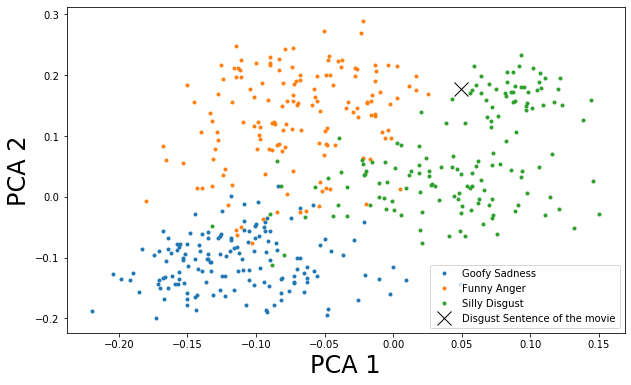

In [48]:
embedding_disgust = get_embedding(DISGUST_SENTENCE)
transform_disgust= pca.transform(np.array(embedding_disgust).reshape(1,-1))[0]
plt.figure(figsize=(10,6))
for emotion in EMOTIONS[0:3]:
    x = emotion_pca_dict[emotion]['PCA 1']
    y = emotion_pca_dict[emotion]['PCA 2']
    plt.plot(x,y,'.',label=emotion)
    plt.legend(fontsize=10)
plt.plot(transform_disgust[0],transform_disgust[1],'x',markersize=14,label='Disgust Sentence of the movie',color='k')
plt.legend(fontsize=10)
plt.xlabel('PCA 1',fontsize=24)
plt.ylabel('PCA 2',fontsize=24)